**Assignment 9**- Association Rules

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data= pd.read_csv('/content/book.csv')

In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
data.shape              ## no.of rows and columns

(2000, 11)

In [5]:
data.size

22000

Check for null values 

In [6]:
data.info()                          ## no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


Visualizing the frequency of different book categories using barplot

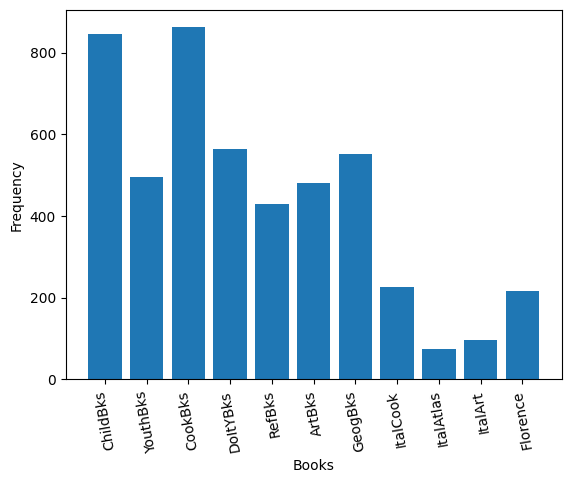

In [7]:
plt.bar (data.columns ,data.sum(axis=0))
plt.xticks(rotation = 100)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

Implementing an Apriori algorithm

In [8]:
d1 = apriori(data, min_support=0.1, use_colnames=True)
d1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


**Building an Association Model**

Using the metric Lift

In [9]:
rule1 = association_rules(d1, metric="lift", min_threshold=0.8)


In [10]:
rule1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


Sorting the books based on the association rule in ascending order, with respect to lift criteria

In [11]:
rule1.sort_values('lift',ascending = False,inplace=True)

Scatter plot for support and confidence for the first association role, with respect to Lift criteria

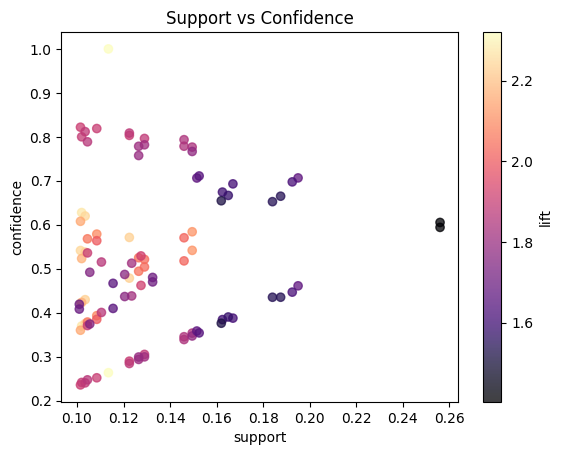

In [12]:
plt.scatter(rule1['support'], rule1['confidence'],c=rule1['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

Scatter plot for support and lift  for the first association rule(Confidence criteria)

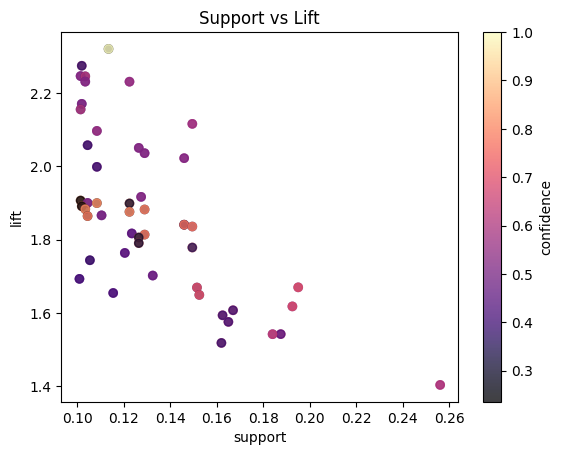

In [13]:
plt.scatter(rule1["support"], rule1["lift"],c=rule1['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

Checking the associated books for the category "ChildBooks"

In [48]:
bookname='ChildBks'
rule1_ChildBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
76,"(ArtBks, ChildBks)",(GeogBks)
52,"(ChildBks, CookBks)",(RefBks)
78,"(ChildBks, GeogBks)",(ArtBks)
64,"(ChildBks, CookBks)",(GeogBks)
70,"(DoItYBks, ChildBks)",(GeogBks)
60,"(ChildBks, CookBks)",(ArtBks)
42,"(ChildBks, CookBks)",(YouthBks)
48,"(ChildBks, CookBks)",(DoItYBks)
72,"(ChildBks, GeogBks)",(DoItYBks)
55,(ChildBks),"(CookBks, RefBks)"


checking the Associated books for the category,YouthBooks

In [15]:
bookname='YouthBks'
rule1_YouthBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
43,(YouthBks),"(ChildBks, CookBks)"
41,"(YouthBks, CookBks)",(ChildBks)
40,"(ChildBks, YouthBks)",(CookBks)
18,(YouthBks),(GeogBks)
17,(YouthBks),(ArtBks)
15,(YouthBks),(DoItYBks)
0,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)


checking the Associated books for the category,  CookBooks

In [ ]:
bookname='CookBks'
rule1_CookBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_CookBks,["antecedents","consequents"]]

checking the Associated books for the category, DoItYBooks

In [18]:
bookname='DoItYBks'
rule1_DoItYBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
83,"(DoItYBks, CookBks)",(ArtBks)
85,(DoItYBks),"(ArtBks, CookBks)"
88,"(DoItYBks, CookBks)",(GeogBks)
70,"(DoItYBks, ChildBks)",(GeogBks)
49,(DoItYBks),"(ChildBks, CookBks)"
91,(DoItYBks),"(CookBks, GeogBks)"
82,"(DoItYBks, ArtBks)",(CookBks)
73,(DoItYBks),"(ChildBks, GeogBks)"
89,"(DoItYBks, GeogBks)",(CookBks)
71,"(DoItYBks, GeogBks)",(ChildBks)


Checking the Associated books for the category, RefBooks

In [19]:
bookname='RefBks'
rule1_RefBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
57,(RefBks),"(ChildBks, CookBks)"
54,"(CookBks, RefBks)",(ChildBks)
53,"(ChildBks, RefBks)",(CookBks)
37,(RefBks),(GeogBks)
31,(RefBks),(DoItYBks)
7,(RefBks),(ChildBks)
23,(RefBks),(CookBks)


checking the Associated books for the category, ArtBooks

In [20]:
bookname='ArtBks'
rule1_ArtBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
76,"(ArtBks, ChildBks)",(GeogBks)
86,(ArtBks),"(DoItYBks, CookBks)"
94,"(ArtBks, CookBks)",(GeogBks)
97,(ArtBks),"(CookBks, GeogBks)"
79,(ArtBks),"(ChildBks, GeogBks)"
84,"(ArtBks, CookBks)",(DoItYBks)
61,(ArtBks),"(ChildBks, CookBks)"
38,(ArtBks),(GeogBks)
82,"(DoItYBks, ArtBks)",(CookBks)
77,"(ArtBks, GeogBks)",(ChildBks)


checking the Associated books for the category, GeogBks

In [21]:
bookname='GeogBks'
rule1_GeogBks =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
81,(GeogBks),"(ArtBks, ChildBks)"
99,(GeogBks),"(ArtBks, CookBks)"
96,"(CookBks, GeogBks)",(ArtBks)
78,"(ChildBks, GeogBks)",(ArtBks)
69,(GeogBks),"(ChildBks, CookBks)"
93,(GeogBks),"(DoItYBks, CookBks)"
75,(GeogBks),"(DoItYBks, ChildBks)"
90,"(CookBks, GeogBks)",(DoItYBks)
39,(GeogBks),(ArtBks)
72,"(ChildBks, GeogBks)",(DoItYBks)


checking the Associated books for the category, ItalCook

In [22]:
bookname='ItalCook'
rule1_ItalCook =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


checking the Associated books for the category, ItalAtlas

In [23]:
bookname='ItalAtlas'
rule1_ItalAtlas =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


checking the Associated books for the category, ItalArt

In [24]:
bookname='ItalArt'
rule1_ItalArt =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_ItalArt,["antecedents","consequents"]]

,antecedents,consequents


checking the Associated books for the category,  Florence

In [25]:
bookname='Florence'
rule1_Florence =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_Florence,["antecedents","consequents"]]

,antecedents,consequents


**Model 2**


Create another association rule by taking different length in Apriori rule and diffrent minimum support 

In [26]:
d2 = apriori(data, min_support=0.15, use_colnames=True)
d2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [28]:
rule2 = association_rules(d2, metric="lift", min_threshold=0.8)
rule2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [30]:
rule2.sort_values('lift',ascending = False,inplace=True)
rule2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


Scatter plot for support and confidence of second association rule

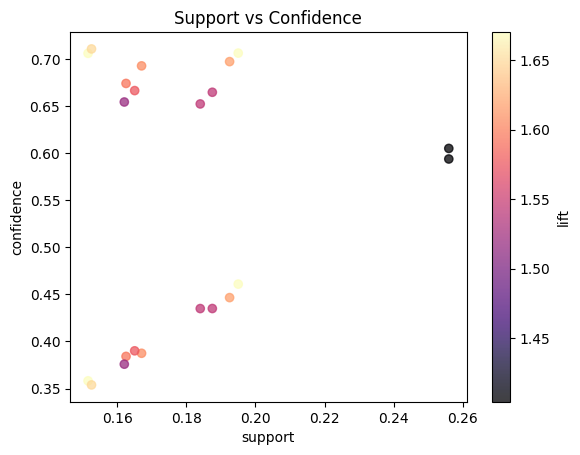

In [36]:
plt.scatter(rule2['support'], rule2['confidence'],c=rule2['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

scatter plot for support and lift of second association rule

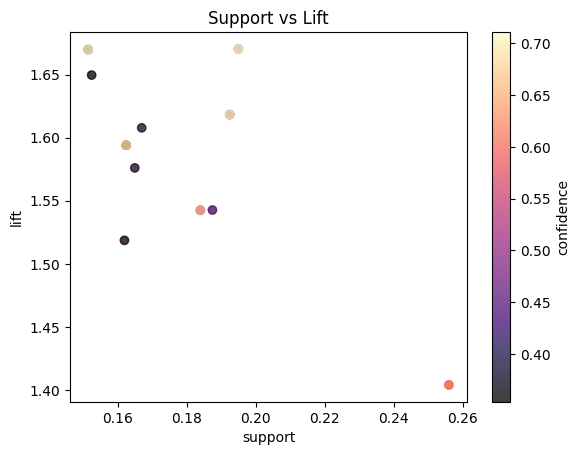

In [35]:
plt.scatter(rule2["support"], rule2["lift"],c=rule2['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

**Model 3**


Creating another association rule by taking different length in Apriori

In [37]:
d3 = apriori(data, min_support=0.05, use_colnames=True)
d3.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [38]:
rule3 = association_rules(d3, metric="lift", min_threshold=0.8)
rule3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


Sorting values based on the lift metric

In [40]:
rule3.sort_values('lift',ascending = False,inplace=True)
rule3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
183,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
513,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
508,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
511,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474


scatter plot(Support vs confidence)

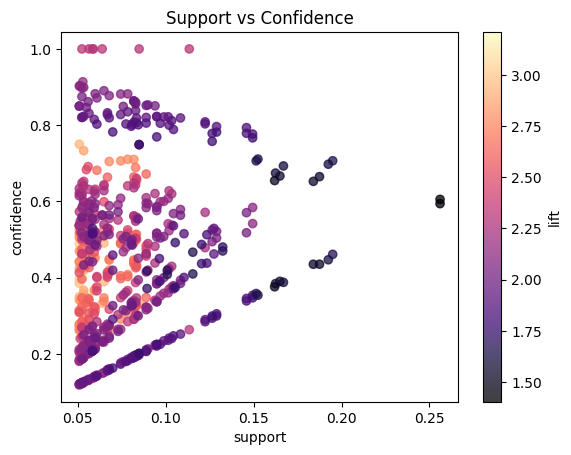

In [41]:
plt.scatter(rule3['support'], rule3['confidence'],c=rule3['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

scatter plot (Support vs lift)

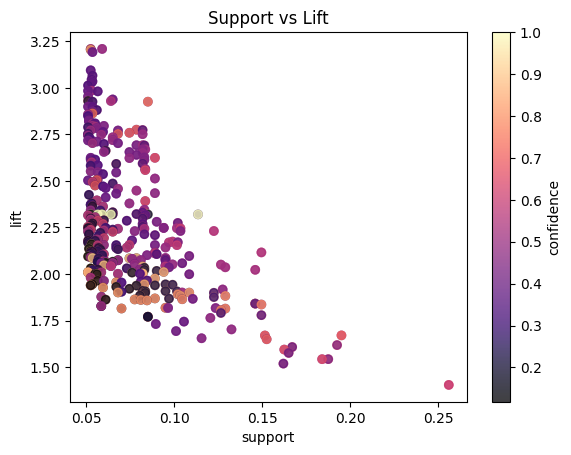

In [42]:
plt.scatter(rule3["support"], rule3["lift"],c=rule3['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

Consolidating the results

In [49]:
p={'Association Rule':pd.Series(['Rule1','Rule2','Rule3']),
               'Lift':[max(rule1.lift),max(rule2.lift),max(rule3.lift)]
               }
p=pd.DataFrame(p)
p

,Association Rule,Lift
0,Rule1,2.320186
1,Rule2,1.670264
2,Rule3,3.208789


Lift value of Rule3 model is high so predicting the associated books for cook books using third association rule

In [50]:
bookname='CookBks'
rule3_CookBks =(rule3.lift>1) & (rule3['antecedents'].astype(str).str.contains(bookname))
rule3.loc[rule3_CookBks,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
182,"(YouthBks, CookBks)",(ItalCook),3.208789
513,"(CookBks, GeogBks)","(ItalCook, ChildBks)",3.208556
511,"(ChildBks, CookBks)","(ItalCook, GeogBks)",3.204346
642,"(ArtBks, ChildBks, CookBks)","(DoItYBks, GeogBks)",3.191886
507,"(ChildBks, CookBks, GeogBks)",(ItalCook),3.094014
...,...,...,...
32,(CookBks),(GeogBks),1.618245
31,(CookBks),(ArtBks),1.607763
27,(CookBks),(DoItYBks),1.542677
15,(CookBks),(YouthBks),1.518667


**Conclusion**-
 From the consolidated results, the rule 3 has a higher lift metric,showing more associations to all the books. Thus, we can use the association rules of model3 i.e rule3